In [1]:
import os
import numpy as np
import scipy.misc
import imageio
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dirpath = 'recons_data\\dataset\\'
outputdir = 'reconstructionMri\\'

In [3]:
uniform_mat = np.ones(shape = (256,256))
for i in range(0,256,2):
    for j in range(0,256):
        uniform_mat[i,j] = 0

In [4]:
dir_names = os.listdir(dirpath)
for folder_names in dir_names:
    filename = dirpath + folder_names + '\\ses-BL\\anat\\' + folder_names + '_ses-BL_T1w.nii.gz'
    images = nib.load(filename)
    data = images.get_fdata(caching = 'fill')
    data = data.astype(np.uint16)
    
    x, frames, y = data.shape
    
    for frame in range(frames):
        input_image = outputdir + 'input_images\\' + folder_names + 'image' + str(frame) + '.png'
        target_image = outputdir + 'target_images\\' + folder_names + 'image' +  str(frame) + '.png'
        
        #fft_data = np.fft.fft2(data[:,frame,:])
        #fft_shift_data = np.fft.fftshift(fft_data)
        #undersampled_data = np.multiply(fft_shift_data, uniform_mat)
        #ifft_data = np.fft.ifft(undersampled_data)
        #undersampled_image = np.fft.ifftshift(ifft_data)
        
        undersampled_image = np.abs(np.real(np.fft.ifft2(np.fft.ifftshift(np.multiply(np.fft.fftshift(np.fft.fft2(data[:,frame,:])), uniform_mat)))))
        scipy.misc.imsave(input_image, undersampled_image)
        scipy.misc.imsave(target_image, data[:,frame,:])

C:\Users\shake\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
C:\Users\shake\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [5]:
data.shape
shift = np.abs(np.fft.ifft2(np.fft.ifftshift(np.multiply(np.fft.fftshift(np.fft.fft2(data[:,109,:])), uniform_mat))))

In [6]:
np.abs(np.real(shift))

array([[2.66453526e-14, 1.59872116e-14, 7.06454374e-14, ...,
        7.00475521e-14, 6.64122475e-14, 6.87375390e-14],
       [4.87014932e-14, 2.85412083e-14, 4.37427872e-14, ...,
        4.97712559e-14, 4.09714292e-14, 7.42459633e-14],
       [4.66927291e-14, 6.09355948e-14, 8.19938649e-14, ...,
        4.64222808e-14, 1.31208465e-14, 3.31558272e-14],
       ...,
       [3.30157339e-14, 1.85130050e-14, 1.48329411e-14, ...,
        9.83879031e-14, 6.55275103e-14, 8.31377763e-14],
       [3.68933251e-14, 1.68438967e-14, 1.41782482e-14, ...,
        6.80410194e-14, 1.74231557e-14, 6.08355841e-14],
       [4.52498592e-14, 7.10500313e-15, 2.59381039e-14, ...,
        3.77466457e-14, 2.77403223e-14, 6.27708803e-14]])

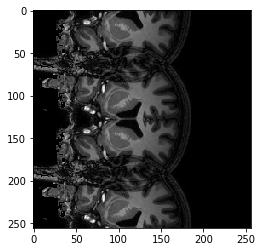

In [7]:
plt.imshow(np.abs(np.real(data[:,109,:])), 'gray')
plt.imshow(np.abs(np.real(shift)), 'gray')

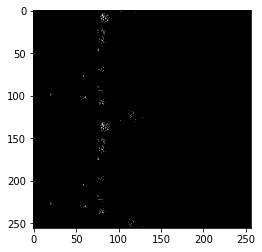

In [8]:
plt.imshow(undersampled_image, 'gray')

In [9]:
np.min(np.abs(np.real(shift)))

0.0

In [10]:
np.min(data[:,109,:])

0

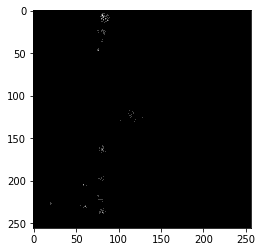

In [11]:
plt.imshow(data[:,181,:], 'gray')

In [59]:
scipy.misc.imsave('reconstructionMri\\input_images\\output.png', undersampled_image)

C:\Users\shake\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.
